## Image Classificatoin on handwritten digits
### Fundamentals of Deep Learning
Part 2: How a Neural Network Trains

#### Load the Data

In [1]:
# Load the MNIST data (a large database of handwritten digits) 
# by keras dataset module 
from tensorflow.keras.datasets import mnist 

In [2]:
# split the data between train and validation 
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()


#### Exploring the data 

In [3]:
print(f"train shape: { x_train.shape}")
print(f"valid shape: {x_valid.shape}")

train shape: (60000, 28, 28)
valid shape: (10000, 28, 28)


In [4]:
x_train.dtype

dtype('uint8')

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

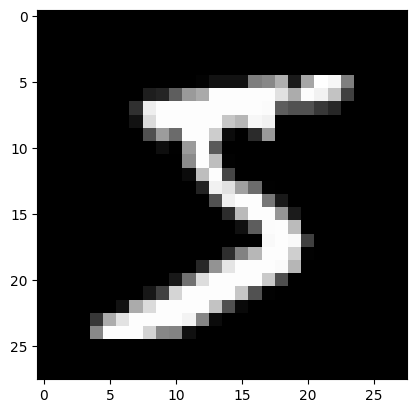

In [6]:
# Using Matplotlib to render the images in grayscale
import matplotlib.pyplot as plt

image= x_train[0]
plt.imshow(image, cmap='gray')

In [7]:
# the labelled value in y_trian
y_train[0]

5

#### Prepare the Data by:
1. Flatten the image data
2. Normalize the image values
3. Categorize the labels


In [8]:
# Flattening the image data for the model to accept it by the input layer 
# wich a 2-dim image to reshape 
# our image is 28*28. so it will be a single array 784 pixels (28*28=784)

x_train = x_train.reshape(60000, 784)
x_valid = x_valid.reshape(10000, 784)

print(f"train shape: { x_train.shape}")
print(f"valid shape: {x_valid.shape}")

train shape: (60000, 784)
valid shape: (10000, 784)


In [9]:
# We normalize the image values to be between 0 and 1
# DL models are better to deal with floating point numbers between 0 and 1

x_train = x_train / 255
x_valid = x_valid / 255

x_train.dtype

dtype('float64')

In [10]:
# Categorical Encoding as one-hot encoding
# the model might mistakenly interpret these numbers as having a numerical relationship
# so we categorize the labels for ex:
#                                   Cat: [1, 0, 0]
#                                   Dog: [0, 1, 0]
#                                   Bird: [0, 0, 1]


import tensorflow.keras as keras
num_categories = 10

y_train_before=y_train
y_train = keras.utils.to_categorical(y_train, num_categories)
y_valid = keras.utils.to_categorical(y_valid, num_categories)


In [11]:
y_train_before[0:9]

array([5, 0, 4, 1, 9, 2, 1, 3, 1], dtype=uint8)

In [12]:
y_train[0:9]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

#### Create the Model


In [13]:
# Using Sequentail model as it's a simple and intuitive way to build 
# neural network models, especially for simpler architectures.

from tensorflow.keras.models import Sequential

model =Sequential()


# Creating the input layer
# as our image is flattened to be 784 values, the input layer will be as the shape of the image
from tensorflow.keras.layers import Dense

model.add(Dense(units = 512, activation='relu', input_shape=(784,))) # the input layer connected to one hidden layer 512 as in the presentation
model.add(Dense(units = 512, activation='relu')) # add another hidden layer as there are 2 hidden layers in the experimentation
model.add(Dense(units = 10, activation='softmax')) # the model will guess 10 possible categories

# ReLU in the hidden layers introduces non-linearity, allowing the network to learn complex patterns.
# Softmax in the output layer ensures that the output values represent probabilities, making it suitable for multi-class classification problems.

In [14]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


#### Compiling the model

In [15]:
# categorical_crossentropy --> - Σ(y_i * log(p_i))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])


#### Training the model

In [31]:
# Training Data: The dataset used to train the model.
# Training Labels: The corresponding labels or targets for the training data.
# Epochs: The number of complete passes through the entire training dataset.
# Validation Data (Optional): A separate dataset to evaluate the model's performance during training. This helps prevent overfitting.


history = model.fit(
    x_train, y_train, epochs=5, verbose=1, validation_data=(x_valid, y_valid)
)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0153 - accuracy: 0.9979 - val_loss: 0.3994 - val_accuracy: 0.9820
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0163 - accuracy: 0.9980 - val_loss: 0.4120 - val_accuracy: 0.9798
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0148 - accuracy: 0.9978 - val_loss: 0.4035 - val_accuracy: 0.9823
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0146 - accuracy: 0.9982 - val_loss: 0.4808 - val_accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0136 - accuracy: 0.9984 - val_loss: 0.5037 - val_accuracy: 0.9793


#### Making Predictions

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 


# Load the trained model

# Load and preprocess the image
img = Image.open('Data/3_Img.jpeg')  # Replace with your image path
img = img.convert('L')  # Convert to grayscale
img = img.resize((28, 28))  # Resize to 28x28 pixels
img_array = np.array(img)
img_array = img_array.reshape(1, 784)  # Reshape for the model
img_array = img_array / 255.0  # Normalize pixel values

# Make a prediction
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction) 



Predicted digit: 3


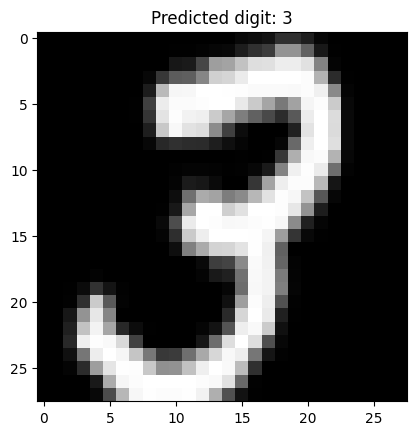

In [ ]:
print("Predicted digit:", predicted_class)
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f"Predicted digit: {predicted_class}")
plt.show()
